<IPython.core.display.Javascript object>


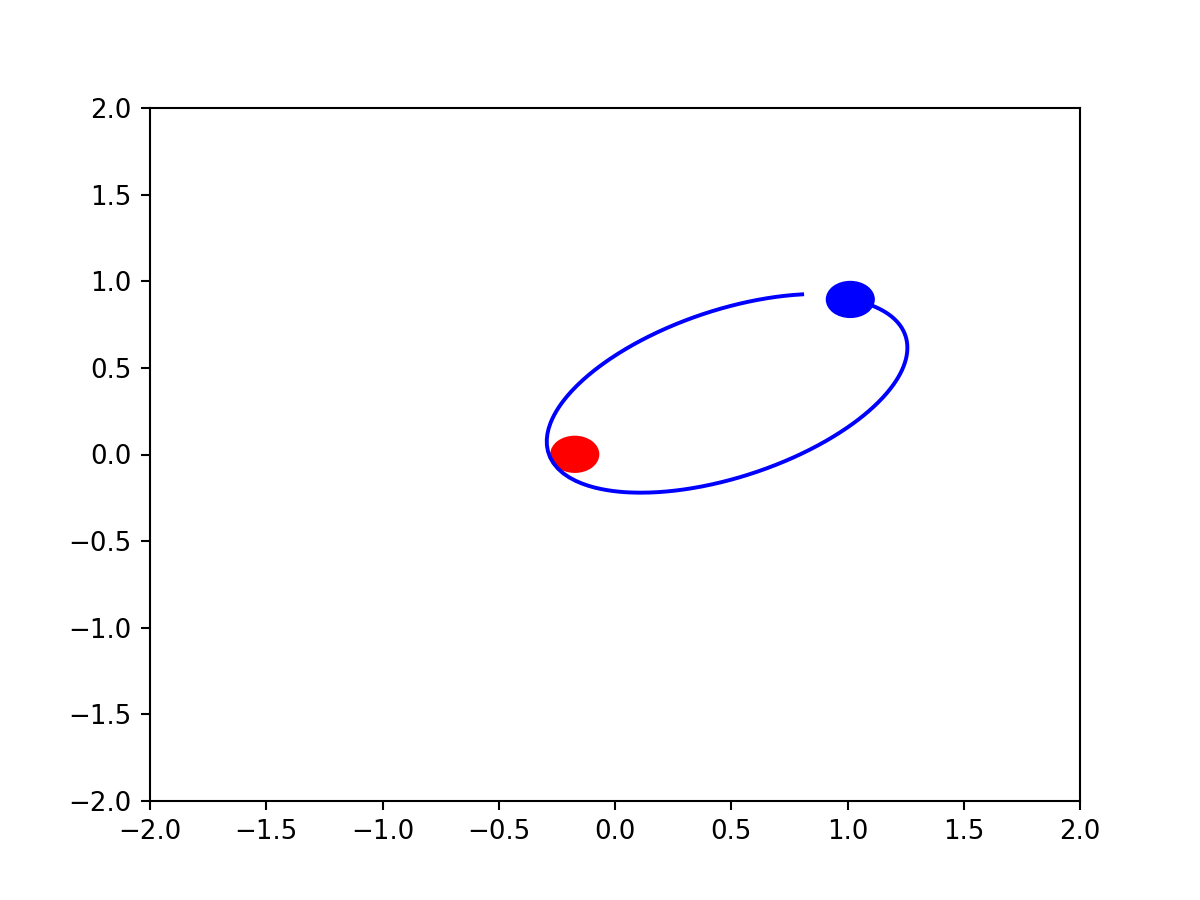

In [1]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'  # Figuras de alta calidad en Jupyter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Inicialización de parámetros
G = 1e-2  # Constante gravitacional
m1 = 100  # Masa del primer cuerpo
m2 = 1  # Masa del segundo cuerpo

# Analizar casos: m1 = 25, 50, 100 con G = 1e-1, 1e-2

# Condiciones iniciales
r1 = np.array([0.0, 0.0])
v1 = np.array([0.0, 0.0])
r2 = np.array([1.0, 1.0])
v2 = np.array([-0.5, 0.0])

# Paso de tiempo
dt = 0.01

# Número de pasos en la animación
num_steps = 1000

# Arrays para almacenar las trayectorias
trajectory1 = np.zeros((num_steps, 2))
trajectory2 = np.zeros((num_steps, 2))
trajectory1[0] = r1
trajectory2[0] = r2

# Función para calcular la fuerza gravitacional
def gravitational_force(r1, r2, m1, m2):
    r = r2 - r1
    distance = np.linalg.norm(r)
    force = G*m1*m2*r/distance**3
    return force

# Actualización de posiciones y velocidades
def update_positions(r1, r2, v1, v2, dt):
    f12 = gravitational_force(r1, r2, m1, m2)
    
    a1 = f12/m1
    a2 = -f12/m2  # Fuerza en dirección opuesta para el segundo cuerpo
    
    v1 += a1*dt
    v2 += a2*dt
    
    r1 += v1*dt
    r2 += v2*dt

    return r1, r2, v1, v2

# Inicializar la figura y los ejes
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# Crear los objetos de los círculos
circle1 = plt.Circle(r1, 0.1, color='red')
circle2 = plt.Circle(r2, 0.1, color='blue')

ax.add_patch(circle1)
ax.add_patch(circle2)

# Líneas para las trayectorias
line1, = ax.plot([], [], 'r-')
line2, = ax.plot([], [], 'b-')

# Función de animación
def animate(frame):
    global r1, r2, v1, v2
    r1, r2, v1, v2 = update_positions(r1, r2, v1, v2, dt)
    
    # Actualizar la posición de los círculos
    circle1.center = r1
    circle2.center = r2
    
    # Almacenar las posiciones para la trayectoria
    trajectory1[frame] = r1
    trajectory2[frame] = r2
    
    # Actualizar las líneas de las trayectorias
    line1.set_data(trajectory1[:frame+1, 0], trajectory1[:frame+1, 1])
    line2.set_data(trajectory2[:frame+1, 0], trajectory2[:frame+1, 1])
    
    return circle1, circle2, line1, line2

# Crear la animación
ani = FuncAnimation(fig, animate, frames=num_steps, interval=1, blit=True)

# Mostrar la animación
plt.show()